In [6]:
from google.colab import files 
uploaded = files.upload() #Imports the data 

Saving Data.csv to Data.csv


In [7]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

data = pd.read_csv(io.StringIO(uploaded['Data.csv'].decode('utf-8')))  
#Reads the data file and decodes the CSV
#The dataset is now stored as a dataframe

data.Loan_Status.replace(('Y', 'N'), (1, 0), inplace=True)

data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.4+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


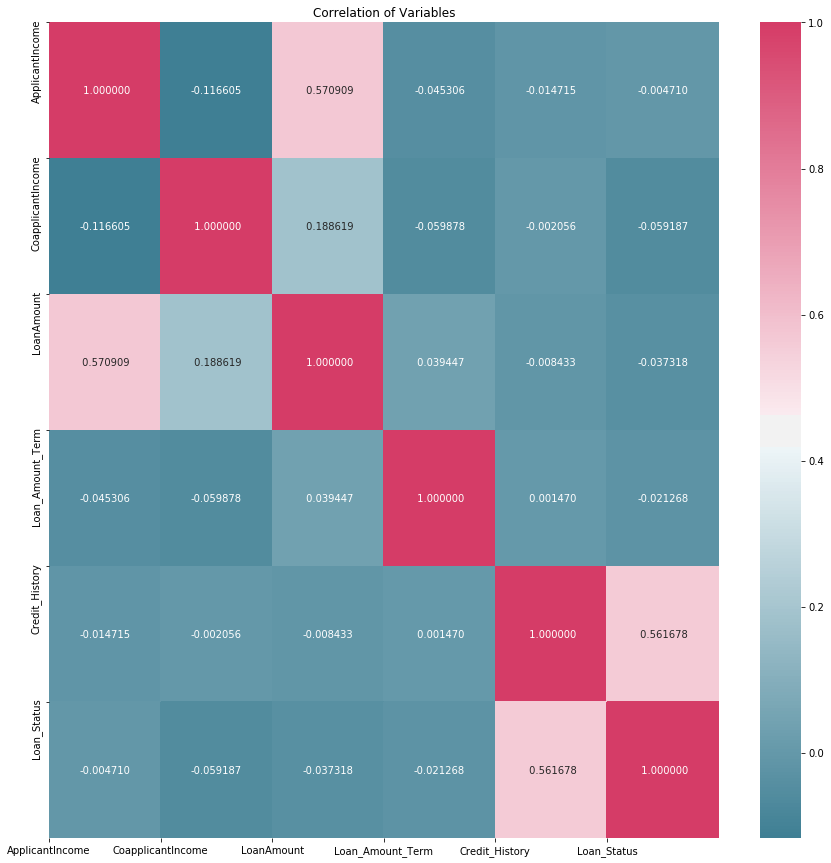

In [8]:
corr=data.corr()
fig,ax=plt.subplots(figsize=(15,15))
colormap=sns.diverging_palette(221,1, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=" 2f")
plt.title('Correlation of Variables')
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

#Correlation Visualisation between the variables to determine if any variables need to be removed

In [0]:
data = data.drop(['Loan_ID'], axis=1)

# We drop the Loan_ID column as 
# it is an identifier and does not offer any benefit in prediction.

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Text(0.5, 1.0, 'Empty Cells')

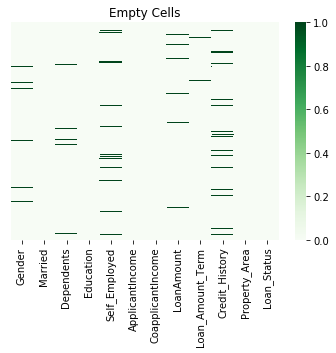

In [10]:
print (data.isnull().sum()) 
#Prints a summary of the null cells in each column of the data

sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='Greens')
#Prints a heatmap of the null cells for identification of which column is most effected by the null values

plt.title('Empty Cells')


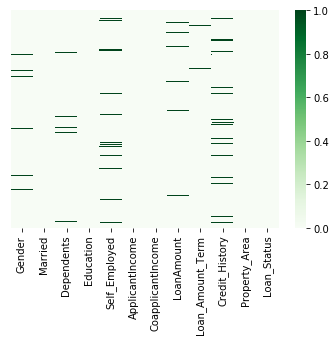

In [11]:
median = data['CoapplicantIncome'].median()
data['CoapplicantIncome'].fillna(median, inplace=True)
#Replaces the null cells in the CoapplicantIncome column with the median value of the column

sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='Greens')

#Prints a heatmap of the null cells, showing the Coapplicant Income column now has no empty cells.

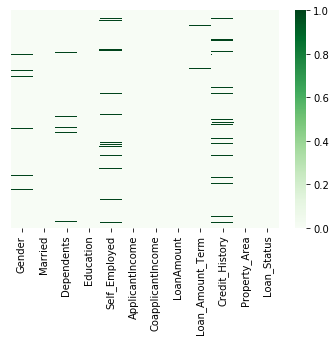

In [12]:
median = data['LoanAmount'].median()
data['LoanAmount'].fillna(median, inplace=True)
#Replaces the null cells in the LoanAmount column with the median value of the column

sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='Greens')
#Prints a heatmap of the null cells, showing the Loan Amount column now has no empty cells.


In [0]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

#Here we are replacing the empty data cells with the mode

In [0]:

data.dropna(inplace=True)

#Dropping the rows with empty cells in the credit rating column due to the high correlation of credit rating


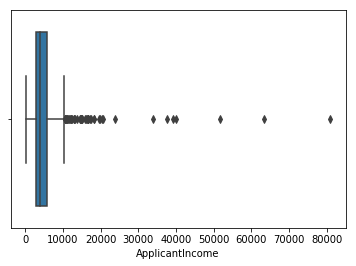

In [19]:
sns.boxplot(x=data['ApplicantIncome'])
#A visual plot of the outliers in the Applicant income column

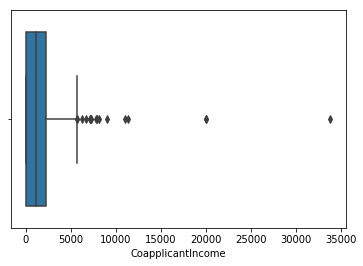

In [20]:
sns.boxplot(x=data['CoapplicantIncome'])
#A visual plot of the outliers in the Coapplicant income column

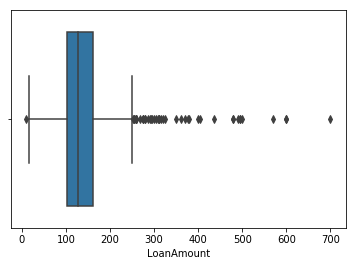

In [21]:
sns.boxplot(x=data['LoanAmount'])
#A visual plot of the outliers in the Loan amount column

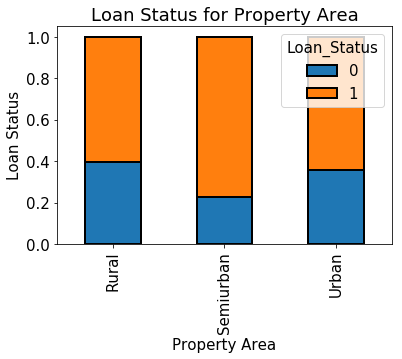

In [22]:

plt.rc("font", size=15)
table = pd.crosstab(data.Property_Area, data.Loan_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, lw=2,ec='black')
plt.title('Loan Status for Property Area')
plt.xlabel('Property Area')
plt.ylabel('Loan Status')
plt.savefig('prop_vs_ls_bar')

#A visual plot of the loan status outcome based on each column

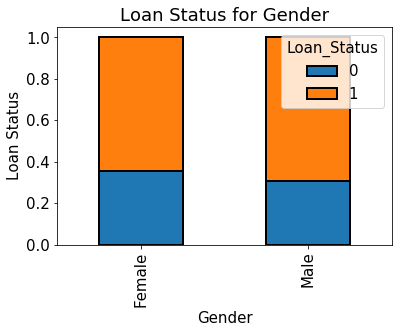

In [23]:
table = pd.crosstab(data.Gender, data.Loan_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, lw=2,ec='black')
plt.title('Loan Status for Gender')
plt.xlabel('Gender')
plt.ylabel('Loan Status')
plt.savefig('gend_vs_ls_bar')
#A visual plot of the loan status outcome based on each column

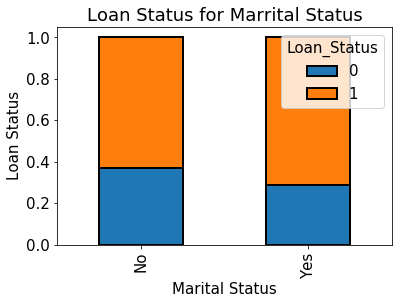

In [24]:
table = pd.crosstab(data.Married, data.Loan_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, lw=2,ec='black')
plt.title('Loan Status for Marrital Status')
plt.xlabel('Marital Status')
plt.ylabel('Loan Status')
plt.savefig('ms_vs_ls_bar')
#A visual plot of the loan status outcome based on each column

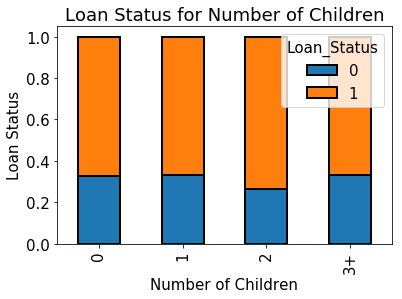

In [25]:
table = pd.crosstab(data.Dependents, data.Loan_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, lw=2,ec='black')
plt.title('Loan Status for Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Loan Status')
plt.savefig('dep_vs_ls_bar')
#A visual plot of the loan status outcome based on each column

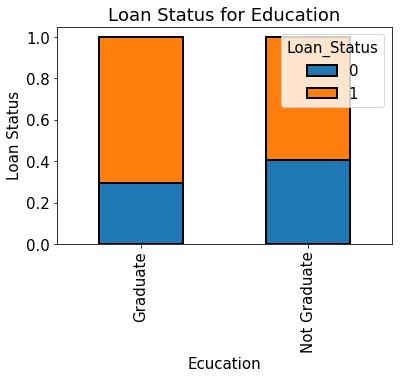

In [26]:
table = pd.crosstab(data.Education, data.Loan_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, lw=2,ec='black')
plt.title('Loan Status for Education')
plt.xlabel('Ecucation')
plt.ylabel('Loan Status')
plt.savefig('edu_vs_ls_bar')
#A visual plot of the loan status outcome based on each column

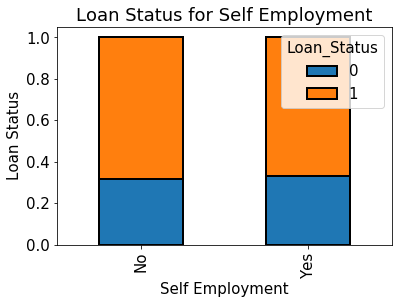

In [27]:
table = pd.crosstab(data.Self_Employed, data.Loan_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, lw=2,ec='black')
plt.title('Loan Status for Self Employment')
plt.xlabel('Self Employment')
plt.ylabel('Loan Status')
plt.savefig('se_vs_ls_bar')
#A visual plot of the loan status outcome based on each column

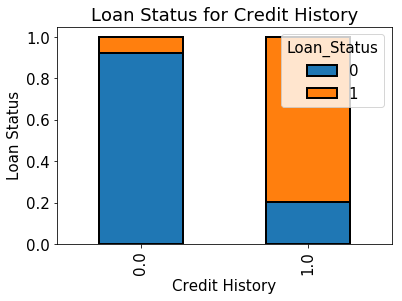

In [28]:
table = pd.crosstab(data.Credit_History, data.Loan_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, lw=2,ec='black')
plt.title('Loan Status for Credit History')
plt.xlabel('Credit History')
plt.ylabel('Loan Status')
plt.savefig('ch_vs_ls_bar')
#A visual plot of the loan status outcome based on each column

In [0]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
(data < (Q1-1.5*IQR)) | (data > (Q3 + 1.5 * IQR))
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

#Removal of outliers from the dataset using the IQR formula


In [0]:
gender = pd.get_dummies(data['Gender'],drop_first=True)

married = pd.get_dummies(data['Married'],drop_first=True)

dependents = pd.get_dummies(data['Dependents'],drop_first=True)

education = pd.get_dummies(data['Education'],drop_first=True)

self_employed = pd.get_dummies(data['Self_Employed'],drop_first=True)

property_area = pd.get_dummies(data['Property_Area'],drop_first=True)

data.drop(['Gender', 'Married', 'Dependents','Education','Self_Employed','Property_Area','Loan_Amount_Term'],axis=1, inplace = True)

data =pd.concat([data,gender,married,dependents,education,self_employed,property_area],axis=1)





#Transformation of continuous variables to categorical variables for classification

In [0]:
import matplotlib.pyplot as plotter


pieLabels = '1', '0'



figureObject, axesObject = plotter.subplots()
axesObject.pie(data['Loan_Status'].value_counts(),labels=pieLabels,autopct='%1.2f')

#Visual representation of the number of Yes and No loan classifications in the entire data set.

In [0]:
#Neural Network
from sklearn.metrics import accuracy_score

import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


#Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Loan_Status', axis=1),data['Loan_Status'], test_size=0.15, random_state=0)


#Scaling the data (normalizing) for optimal classification between 0 and 1
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
                          
#Setting the parameteres of the MLP classifier

mlp = MLPClassifier()

mlp.fit(X_train,y_train)
MLPClassifier(activation='tanh', 
              alpha=0.0001, 
              hidden_layer_sizes=(14, 14, 14, 14), 
              learning_rate='constant',  
              random_state=None,
              solver=['adam'])
              

#Optimizing the parameters of the MLP classifier to find the best performing model
parameter_space = { 
              'hidden_layer_sizes': [(8, 8, 8,8),(13, 13, 13,13),(14, 14, 14,14),(15, 15, 15,15), (16, 16, 16,16)],
              'activation': ['tanh', 'relu'],
              'solver': ['sgd', 'adam'],
              'alpha': [0.00001, 0.0001, 0.005, 0.05],
              'learning_rate': ['constant','adaptive'],
              
              
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

print('Best parameters found:\n', clf.best_params_)

In [0]:
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

#The cconfusion matrix will represent the prediction accuracy

In [0]:
print(classification_report(y_test,predictions))

#Printing of the classification report

In [0]:
print("Accuracy:",accuracy_score(y_test, predictions))

#Printing of the accuracy score

In [0]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.5)
ax.scatter(x = range(0, predictions.size), y=predictions, c = 'red', label = 'Predicted', alpha = 0.5)


plt.title('Actual and predicted values')

plt.xlabel('Observations')
plt.ylabel('Loan Status')
plt.legend()
plt.show()

#A graphical representation of the classification performance.

In [0]:
#Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(data.drop('Loan_Status', axis=1),data['Loan_Status'], test_size=0.18, random_state=9)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

#Defining the predictions through the logirithimic model
predictions = logmodel.predict(X_test)


#Setting the parameter space for optimization
parameter_space = { 
              
              'random_state':[ 9, 10, 11] }

#Optimizing the performance of the log regression


clf = GridSearchCV(logmodel, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

print('Best parameters found:\n', clf.best_params_)





In [0]:
print(classification_report(y_test,predictions))
print("Accuracy:",accuracy_score(y_test, predictions))

              
#Printing of the accuracy score  


In [0]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.5)
ax.scatter(x = range(0, predictions.size), y=predictions, c = 'red', label = 'Predicted', alpha = 0.5)


plt.title('Actual and predicted values')

plt.xlabel('Observations')
plt.ylabel('Loan Status')
plt.legend()
plt.show()

#A graphical representation of the classification performance.

In [0]:
print(confusion_matrix(y_test,predictions))
#Printing of the classification report

In [0]:
#DecisionTree Classifier 
from numpy import loadtxt

from sklearn.metrics import accuracy_score


import io
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

#Splitting of the data into training and test sets

X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(data.drop('Loan_Status', axis=1),data['Loan_Status'], test_size=0.18, stratify=y, random_state=10)

data.head()

dtc = DecisionTreeClassifier()

dtc = dtc.fit(X_train, y_train)
predictions = dtc.predict(X_test)

print("Accuracy:",accuracy_score(y_test, predictions))

In [0]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.5)
ax.scatter(x = range(0, predictions.size), y=predictions, c = 'red', label = 'Predicted', alpha = 0.5)


plt.title('Actual and predicted values')

plt.xlabel('Observations')
plt.ylabel('Loan Status')
plt.legend()
plt.show()

#A graphical representation of the classification performance.

In [0]:
print(classification_report(y_test,predictions))
#Printing of the classification report